In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# read in the data set, set it to show all features, and then display
df = pd.read_csv('churn_clean.csv')
pd.set_option('display.max_columns', 999)
df.head()


,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


<h1><span style="color:#7216b5"> B. </span><h1>

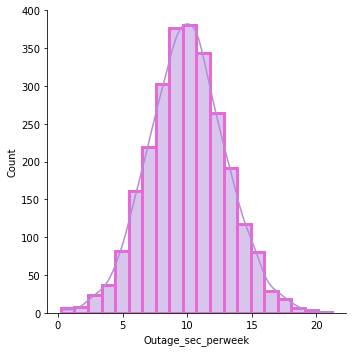

In [3]:
# plot the outage sec for churned
yes = df[df['Churn'] == 'Yes']
sns.displot(data=yes, x='Outage_sec_perweek', kde=True, bins=20, color='#b38cdb', 
            edgecolor='#e868d7', linewidth=3);

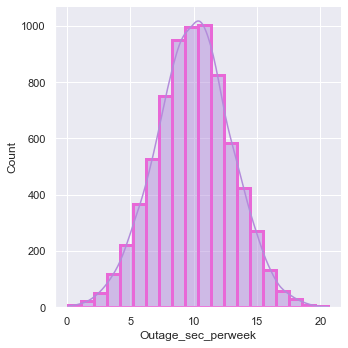

In [4]:
# plot the outage sec for not churned
sns.set(style='darkgrid')
no = df[df['Churn'] == 'No']
sns.displot(data=no, x='Outage_sec_perweek', kde=True, bins=20, color='#b38cdb', 
            edgecolor='#e868d7', linewidth=3);

In [5]:
#t-test for outage and churn   
stats.ttest_ind(df['Outage_sec_perweek'][df['Churn'] == 'Yes'],
                df['Outage_sec_perweek'][df['Churn'] == 'No'], 
                equal_var=False)

Ttest_indResult(statistic=-0.01565861591811495, pvalue=0.9875074080027457)

<h1><span style="color:#7216b5"> C. </span><h1>

<AxesSubplot:xlabel='Outage_sec_perweek'>

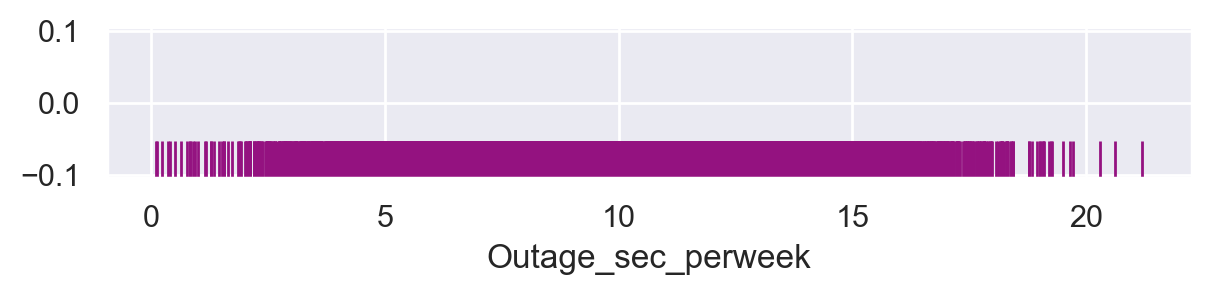

In [6]:
# rugplot showing the distribution of a continuous variable
plt.figure(figsize=(7, 1), dpi=200)
sns.rugplot(x='Outage_sec_perweek', data=df, height=0.25, color='#941280')

<Figure size 1200x800 with 0 Axes>

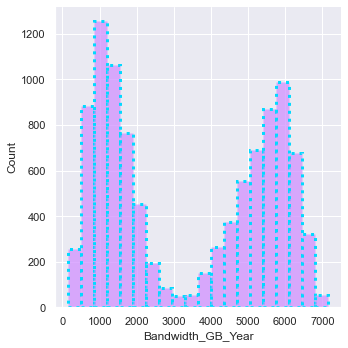

In [7]:
# histogram showing the distribution of a continuous variable
plt.figure(figsize=(6, 4), dpi=200)
sns.set(style='darkgrid')
sns.displot(data=df, x='Bandwidth_GB_Year', bins=20, color='#d191ff', edgecolor='#03d9ff', 
            linewidth=3, ls=":")

<AxesSubplot:xlabel='Marital', ylabel='count'>

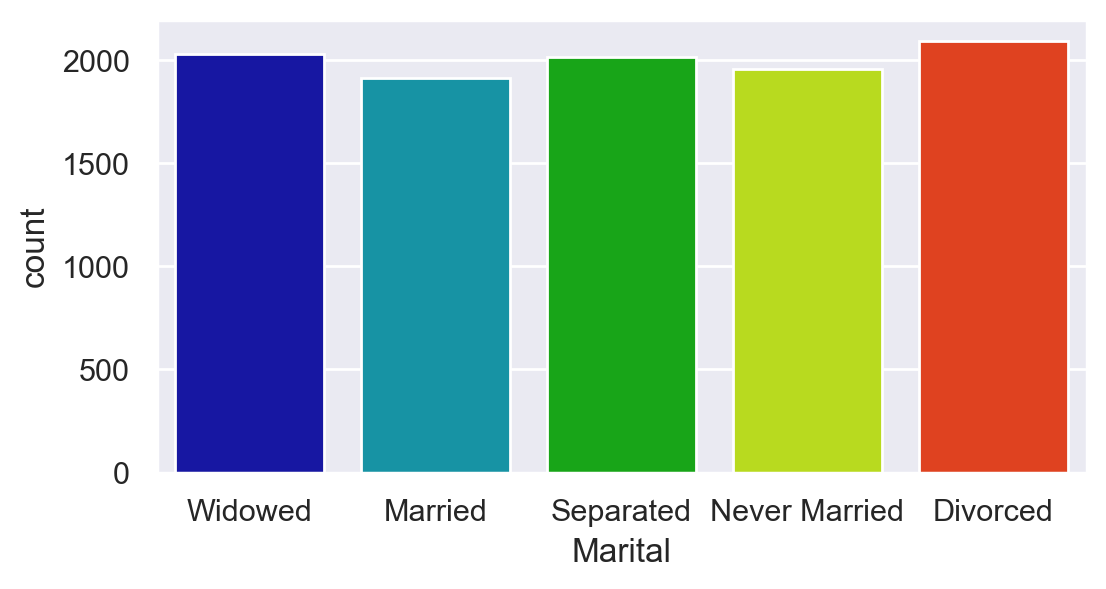

In [8]:
# countplot showing the distribution of a categorical variable
plt.figure(figsize=(6, 3), dpi=200)
sns.countplot(data=df, x='Marital', palette='nipy_spectral')

<AxesSubplot:xlabel='Contract', ylabel='count'>

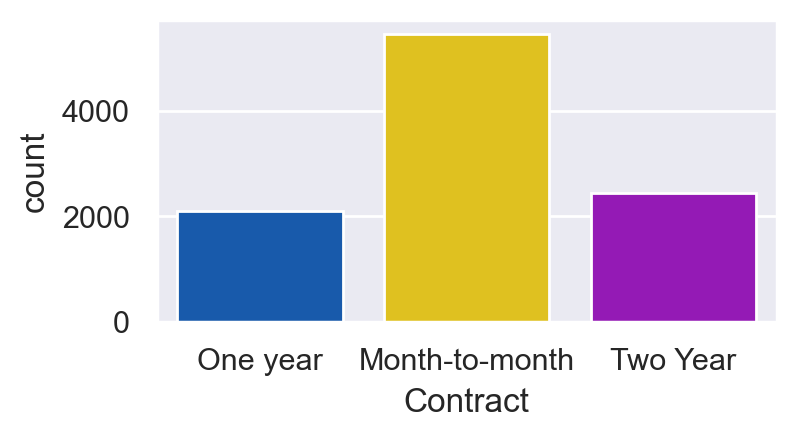

In [9]:
# countplot showing the distribution of a categorical variable
plt.figure(figsize=(4, 2), dpi=200)
sns.countplot(data=df, x='Contract', palette='prism')

<h1><span style="color:#7216b5"> D. </span><h1>

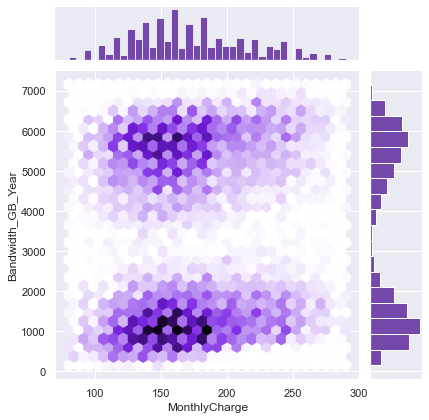

In [10]:
# jointplot showing the distribution of two continuous variables
sns.jointplot(data=df, x='MonthlyCharge', y='Bandwidth_GB_Year', kind='hex', color='#4c1294')

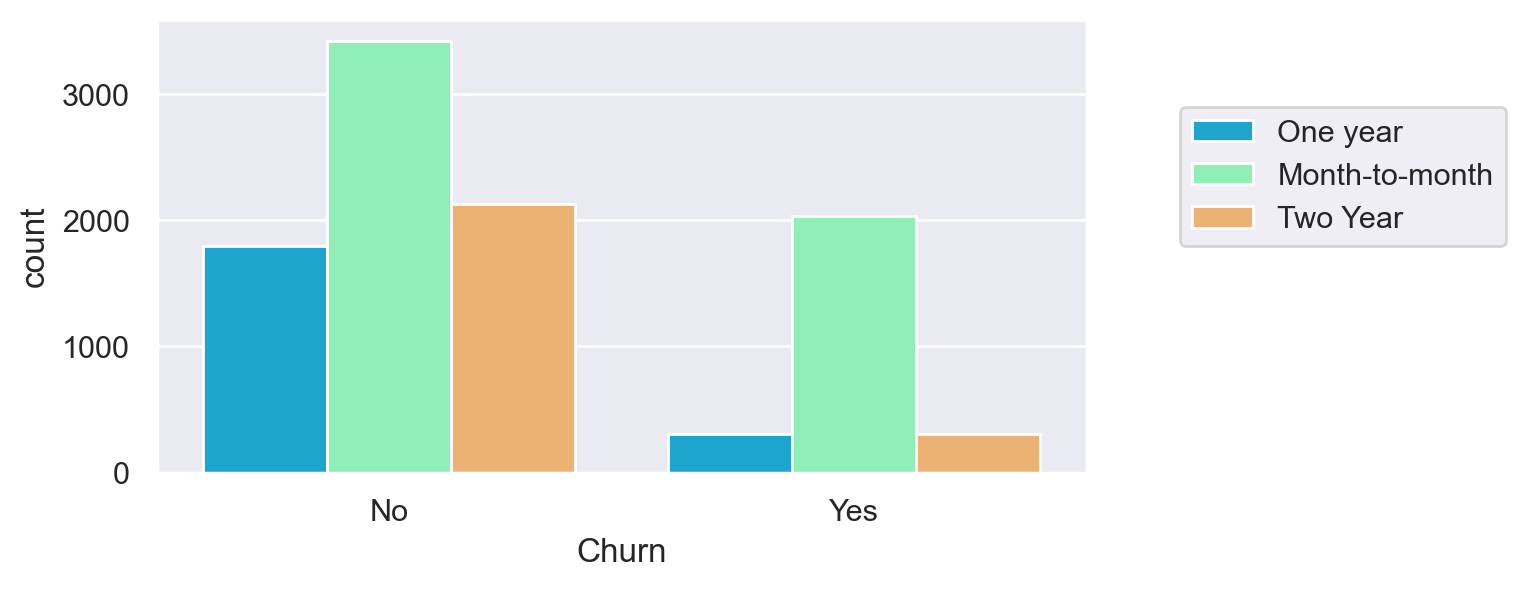

In [11]:
# countplot showing the distribution of two categorical variables
plt.figure(figsize=(6, 3), dpi=200)
sns.countplot(data=df, x='Churn', palette='rainbow', hue='Contract')
plt.legend(loc=(1.1, 0.5))